#전국 관광 정보 데이터 분석하기
---
### 작성자: 20학번 권건우
---
공공 데이터 포털 (https://www.data.go.kr/) 에서는,  
분류에 따라 교육,국토관리,공공행정,사회복지 등등  
폭넓은 분류에 따른 데이터가 저장되어 있습니다.

이러한 방대한 데이터 중, **"관광 정보"** 라는 주제에 관련하여  
전국에 존재하는 관광지,산책길,도시공원,지역 특화거리 등..  
다양한 데이터가 존재합니다.


학습한 이산수학의 이론을 데이터에 적용하여,  
개개인의 휴식,휴가에 관한 고민을 해소하기 위한 아이디어를 고찰하며  
이를 실현화하기 위한 프로토타입(prototype)을 구현해봅시다.

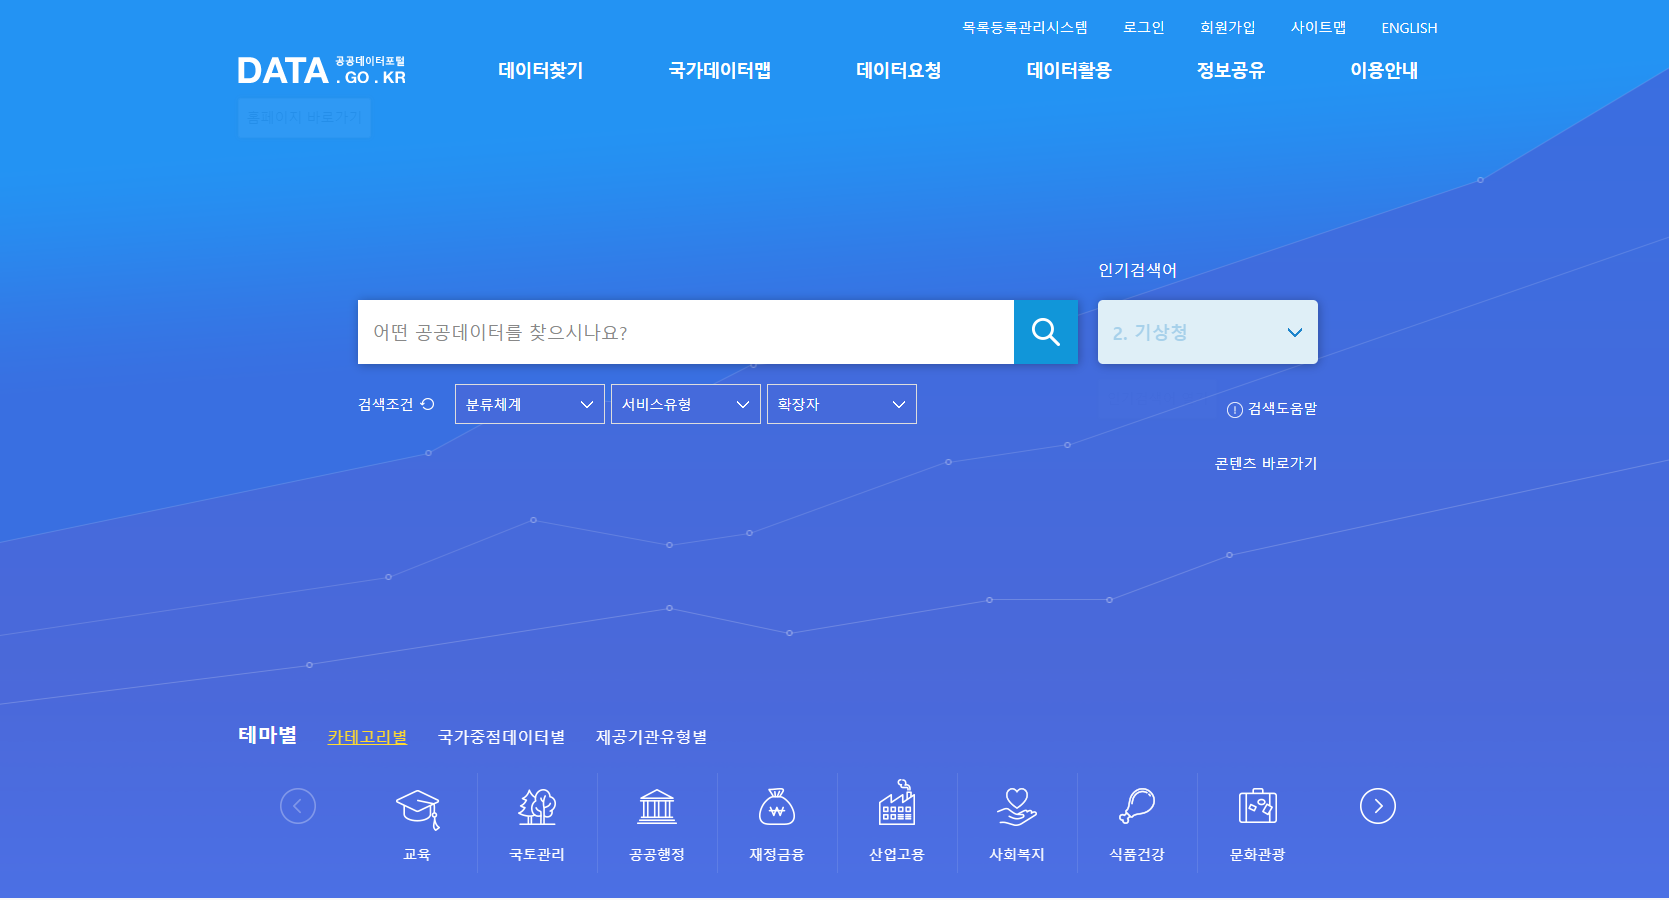

## 필수확인사항:
아래 링크에서 "부산광역시_사하구_관광지정보.csv" 파일을 다운로드 받으시기 바랍니다.
https://drive.google.com/file/d/1--gJXBpQL_Y85sqzCFOgc55hcufj57v2/view?usp=sharing

파일을 올리는 방법은 다운로드한 파일을 왼쪽 탭의 폴더 아이콘을 클릭한 뒤, 파일을 해당 장소에 드래그앤 하거나 업로드 아이콘을 클릭하여 업로드 하시면 됩니다

## 제출 안내
---
필수: 모든 셸에 대해서 정상적인 출력이 되도록 프로그램 실행
제출마감일: ~10.25일까지 제출
제출장소: 정상출력된 결과물(.ipynb)을 가상대학 (HW1-3과제) 란에 개별적으로 업로드
기타 안내: 파일명 변경은 자유
---

# HW1. 판다스(pandas)의 데이터프레임(Dataframe) 다루기

본 과제는 판다스의 데이터 프레임을 조직을 목표합니다.
csv,json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

```각 과제는 아래 세부 과제들로 구성됩니다,```

그럼,
전국엔 어떤 관광지들이 있는지 먼저 알아볼까요?

판다스(pandas) 라는 python 라이브러리는,  
데이터 분석을 위해 널리 사용되는 라이브러리 하나입니다.


In [ ]:
import pandas as pd

전국에 있는 관광지에 대한 데이터파일로부터 데이터를 메모리 내로 가져오기 위해, read_csv함수를 실행하고 결과를 변수 df에  할당합니다

In [ ]:
#CP949는 한글로 인한 텍스트 인코딩을 위한 옵션입니다.

df = pd.read_csv('dataset/부산광역시_사하구_관광지정보.csv',encoding = 'cp949')

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,임진각관광지,관광지,경기도 파주시 문산읍 임진각로 177,경기도 파주시 문산읍 사목리 494-1,37.889318,126.740081,477894.0,관리사무실+관광안내매표소1층+화장실3동+홍보관1층+상황실2층+오수처리장1층+기반시설...,없음,유원시설(평화랜드)+관광열차(평화열차),기념비공원6.25납북자기념관망배단망향의노래비평화의 종각철마는달리고싶다아웅산위령탑장단...,없음,없음,1991-01-28,50000,2091,서울에서 북서쪽으로 약 54km 떨어진 임진각은 6.25 전쟁의 비통한 한이 서려 ...,031-950-1871,파주시 시설관리공단,2021-03-30,4060000,경기도 파주시
1,공릉관광지,관광지,경기도 파주시 조리읍 장곡로 218,경기도 파주시 조리읍 장곡리 420-6,37.749811,126.833566,621155.0,관리사무소+화장실4동+도로+광장+주차장,없음,눈썰매장+ 수영장유원시설(하니랜드),공릉관광지 캠핑장,없음,없음,1977-03-31,3000,350,공릉 근처에 있다. 보트와 배 등 수상 레저시설을 갖춘 호반 관광지이다. 관광지 안...,031-945-2250,㈜성원레저,2021-03-30,4060000,경기도 파주시
2,방화동가족휴가촌,관광지,전라북도 장수군 번암면 방화동로 778,전라북도 장수군 번암면 사암리 625,35.590642,127.526876,250000.0,"관리사무실, 주차장, 화장실, 샤워실, 취사장","가족휴양동 20실, 다문화체험동 5실","족구장 1식, 체육광장 1식","목재문화체험장, 야영장, 인공폭포",NaN,NaN,1988-02-19,2400,200,전국 8대종산에 속하는 장안산 기슭을 따라 펼쳐지는 맑고 깨끗한 계곡을 끼고 조성된...,063-350-2475,장수군 산림과,2021-04-08,4750000,전라북도 장수군
3,송정관광지,관광지,경상남도 남해군 미조면 미송로 483,경상남도 남해군 미조면 송정리 1129,34.723145,128.024967,605283.0,샤워탈의장/화장실(2동)+관리사무실(2동)+오수처리장+주차장,NaN,NaN,NaN,NaN,NaN,1994-10-21,10000,387,"해수욕장이 넓게 분포되어 있으며, 해수욕장을 조금만 벗어나면 몽돌과 기암괴석이 뒤섞...",055-860-8615,경상남도 남해군,2021-03-31,5430000,경상남도 남해군
4,예당국민관광지,관광지,충청남도 예산군 응봉면 예당관광로 161,NaN,36.638013,126.799434,143000.0,관리사무소+화장실(6동)+주차장,NaN,NaN,NaN,NaN,NaN,1986-05-02,20000,185,"예당호를 배경으로 예당호 출렁다리, 예당호 조각공원, 느린호수길, 캠핑장, 야영장이...",041-339-8282,충청남도 예산군청,2021-05-25,4610000,충청남도 예산군


df.head(10) 명령어를 호출하여 상위 10개의 데이터를 불러옵니다.

In [ ]:
df.head(5)

데이터의 컬럼은 관광지명, 관광지구분, 소재지도로명주소,소재지지번주소, 위도, 경도, 면적, 편익시설정보, 숙발시설정보, 운동및오락시설정보, 휴양및문화시설정보, 접객시설정보, 지원시설정보, 지정일자 수용인원수, 주차가능수, 관광지 소개, 관리기관전화번호, 관리기관명, 데이터기준일자, 제공기관코드, 제공기관명명 으로구성됩니다.

다음 명령어를 통해 쉽게 데이터의 컬럼이름을 가져올수 있습니다.

In [ ]:
df.columns

## ■ 문제 1-1. 데이터 프레임의 레코드 수를 출력할 것.
이 데이터셋에 명시된 전국의 관광지는 과연 얼마나 있을까요?
데이터 프레임의 레코드 수(Row의 수)와 필드 수(Column)를 각각 출력하는 프로그램을 작성해봅시다.
```
데이터프레임의 __shape__ 메소드는 데이터의 차원을 표현합니다

참조: https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.shape.html`
```

In [ ]:
# 2차원 행렬로 구성된 데이터 프레임의 크기 출력 ( number_of_rows, number_of_columns )
df.shape

In [ ]:
# 행의 수(레코드의 수)
df.shape[0]

In [ ]:
# 열의 수(컬럼의 수)
df.shape[1]

## ■ 문제 1-2. 데이터의 하위 N개의 레코드 출력
데이터프레임의 상위 N개 항목을 출력해 보았습니다.  
그렇다면 하위 N개 레코드도 출력해 볼까요?
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html
```

In [ ]:
# your code here
df.tail(10)

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
626,헌인릉,관광지,서울특별시 서초구 헌인릉길 36-10,서울특별시 서초구 내곡동 산 13-1,37.465145,127.082645,247.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1970-05-26,500,20,사적 제 194호인 이곳은 동쪽의 헌릉과 서쪽의 인릉으로 구성되어 있다. 헌릉은 조...,02-440-0347,문화재청,2019-08-07,3210000,서울특별시 서초구
627,매헌 윤봉길의사 기념관,관광지,서울특별시 서초구 매헌로 99,서울특별시 서초구 양재동 236,37.471217,127.036736,2627.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1988-12-01,400,50,윤봉길의사의 업적과 살신성인 정신의 높은 뜻을 선양하고 계승 발전시키키 위하여 19...,02-577-9932,국가보훈처,2019-08-07,3210000,서울특별시 서초구
628,고투몰,관광지,서울특별시 서초구 신반포로 200,서울특별시 서초구 잠원동 68-17,37.506598,127.005410,15601.0,화장실,NaN,NaN,NaN,NaN,NaN,1974-04-30,20000,0,"고속터미널 지하상가를 일컫는 고투몰은 카페, 음식점, 꽃시장 등 다양한 먹거리와 볼...",02-535-8182,강남터미널지하쇼핑몰,2019-08-07,3210000,서울특별시 서초구
629,"세빛섬, 반포대교 달빛무지개분수",관광지,서울특별시 서초구 올림픽대로 683,서울특별시 서초구 반포동 650,37.512028,126.995269,10421.0,화장실+주차장,NaN,수상컨벤션센터,"미디어아트갤러리, 전망대",NaN,NaN,2014-10-15,20000,635,"세빛섬은 ''세 개의 빛나는 섬''이라는 의미로, 세계 최초로 물 위에 떠 있는 부...",1566-3433,효성티앤씨,2019-08-07,3210000,서울특별시 서초구
630,삼성딜라이트,관광지,서울특별시 서초구 서초대로74길 11,서울특별시 서초구 서초동 1320-10,37.496609,127.026902,196561.0,화장실,NaN,NaN,NaN,NaN,NaN,2015-09-12,100,888,삼성딜라이트는 테마별로 꾸며진 최신 디지털 기술을 통해 미래의 새로운 생활패턴을 체...,02-2255-2277,삼성,2019-08-07,3210000,서울특별시 서초구
631,부석사관광지,관광지,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,36.994497,128.679619,242280.0,"도로, 보행자도로, 광장, 안내소, 주차장, 화장실 등",-,-,"피크닉마당, 부석사 이야기길, 의상대사 스토리원 등",상가 등,-,2012-06-11,779,540,소백산 자연환경을 배경으로 한 천년고찰 부석사를 직접 참여하고 머무르는 다양한 체험...,054-639-6618,영주시,2020-07-20,5090000,경상북도 영주시
632,산토끼노래동산,관광지,경상남도 창녕군 이방면 이방로 623,NaN,35.576684,128.386189,49910.0,안내소(매표소)+주차장+화장실,NaN,롤링미끄럼틀+레일썰매장+어린이놀이터,작은동물원+토끼먹이체험장,NaN,NaN,2013-11-15,780,195,국민 동요 ‘산토끼’의 유래지역인 창녕군 이방면에 어른들에게는 어린 시절의 추억을 ...,055-530-1533,경상남도 창녕군청,2020-07-20,5410000,경상남도 창녕군
633,우장춘기념관,관광지,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,35.213515,129.072018,1241.0,화장실,NaN,NaN,NaN,NaN,NaN,1999-10-21,100,2,씨 없는 수박으로 우리 모두에게 잘 알려진 세계적 육종학자인 故우장춘박사의 탄생 1...,051-550-6602,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
634,장영실과학동산,관광지,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,35.209163,129.089669,1177.0,화장실(2동),NaN,NaN,NaN,NaN,NaN,2009-10-15,10000,50,동래출신 조선시대 세종당시 최고의 과학자인 장영실이 만든 세계최고의 옛 천문의기 1...,051-550-6604,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
635,박차정의사생가,관광지,부산광역시 동래구 명륜로 98번길 129-10(칠산동),부산광역시 동래구 칠산동 319-1,35.201696,129.090397,379.0,없음,NaN,NaN,NaN,NaN,NaN,2005-07-08,50,0,박차정의사 생가 복원사업은 항일독립운동가이자 한국여성해방운동의 선구자인 박차정의사의...,051-860-7880,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구


또한,
pandas 의 **info** 라는 메소드는,
column의 정보들을 한번에 볼 수 있게 출력해줍니다. 데이터프레임 df의 요약본을 출력해봅시다

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
```

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   관광지명       636 non-null    object 
 1   관광지구분      636 non-null    object 
 2   소재지도로명주소   569 non-null    object 
 3   소재지지번주소    537 non-null    object 
 4   위도         632 non-null    float64
 5   경도         631 non-null    float64
 6   면적         636 non-null    float64
 7   공공편익시설정보   636 non-null    object 
 8   숙박시설정보     341 non-null    object 
 9   운동및오락시설정보  313 non-null    object 
 10  휴양및문화시설정보  367 non-null    object 
 11  접객시설정보     264 non-null    object 
 12  지원시설정보     162 non-null    object 
 13  지정일자       636 non-null    object 
 14  수용인원수      636 non-null    object 
 15  주차가능수      636 non-null    object 
 16  관광지소개      636 non-null    object 
 17  관리기관전화번호   636 non-null    object 
 18  관리기관명      636 non-null    object 
 19  데이터기준일자    636 non-null    object 
 20  제공기관코드    

## ■  문제 1-3: 데이터프레임의 표현적인 통계 보기
주어진 데이터프레임의 표현적인 통계를 출력하시오
다양한 기준에 관한 데이터의 통계를 보고 싶을 때, 표현적인 통계(Descriptive Statistics)를 활용하면 읽을 수 없는 값을 제외하고, 데이터의 중심경향치(Central Tendency), 분산(dispersion), 데이터셋의 분포 모양(shape of a dataset’s distribution) …을 보여줍니다.

```
Descriptive statistics이란? 데이터의 분포의 모양, 퍼짐 정도, 중앙에 몰리는 정도. 최대, 최소값, 평균 을 한눈에 보여주도록 합니다.

참조 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
```

In [ ]:
df.describe()
# your code here

,위도,경도,면적,제공기관코드
count,632.000000,631.000000,6.360000e+02,6.360000e+02
mean,36.024059,127.786428,5.930535e+05,4.686054e+06
std,1.128390,0.896083,2.977617e+06,8.676643e+05
min,33.232865,126.072512,0.000000e+00,3.060000e+06
25%,35.093935,126.995694,2.273500e+03,4.170000e+06
50%,35.773938,127.652540,4.949400e+04,4.820000e+06
75%,36.991953,128.651275,2.453298e+05,5.330000e+06
max,38.514386,129.566532,4.792000e+07,6.520000e+06


## ■ 문제 1-4: 데이터프레임의 사용자 지정 범위에 따른 컬럼(Column) 및 레코드(records) 출력하기(2문제)
전국에 있는 수 많은 관광지 중 행렬의 범위 기준으로 일부 관광지 데이터만 추출하고 합니다.
94 번째 레코드값부터 104번쨰 레코드까지 출력해봅시다.

주어진 데이터프레임에서  
pandas의 **.loc** 메소드를 사용하면,  
사용자 지정 범위에 따라 Col 값과 Row 값을 검색 할 수 있습니다.

```
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label
("Selection by Label" 항목을 참고해주시길 바랍니다.)
```

In [ ]:
# your code here
df.loc[94:104,:]

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
94,여수세계박람회장,관광지,전라남도 여수시 박람회길 1,전라남도 여수시 덕충동 2005,34.752190,127.746501,598000.0,화장실,"다락휴, 엠블호텔, 베네치아호텔, 유탑마리나리조트","스카이플라이, 아쿠아플라넷, 테디베어월드뮤지엄, 빅오쇼","엑스포아트갤러리, 엑스포기념관",안내소,사무실,2012-04-30,0,1909,2012년 여수세계박람회를 성공적으로 개최한 장소로 단순 공원이 아닌 관광부터 비즈...,1577-2012,2012여수세계박람회재단,2020-08-31,4810000,전라남도 여수시
95,여수해양공원,관광지,전라남도 여수시 하멜로 96,전라남도 여수시 종화동 458-5,34.736767,127.748408,0.0,화장실,NaN,U-Bike,"공연장, 놀이터",관광안내소,관리사무소,2012-01-01,0,214,해안선을 따라 조성된 1.5km 구간 시민공원으로 아름다운 여수 밤바다를 만끽 할 ...,061-659-3962,여수시청,2020-08-31,4810000,전라남도 여수시
96,예술랜드리조트,관광지,"전라남도 여수시 돌산읍 무술목길 142-1,",전라남도 여수시 돌산읍 평사리 산244,34.695107,127.776945,65904.0,"화장실, 푸드코트",리조트,"인피니티풀, 트릭아트뮤지엄, 조각공원",NaN,안내데스크,NaN,2018-07-15,0,0,"전 객실 오션뷰, AR로 체험하는 국내 최대 테마형 3D트릭아트뮤지엄, +60미터 ...",1522-2600,(주)여수예술랜드,2020-08-31,4810000,전라남도 여수시
97,여수이순신대교,관광지,전남 여수시 묘도7길 110,전남 여수시 묘도동 산127-37,34.888766,127.705501,0.0,화장실,NaN,NaN,전망대,안내데스크,사무실,2013-02-08,0,0,"세계최고의 높이를 자랑하는 주탑높이(270m)는 63빌딩보다 높고 주탑간 거리 1,...",061-807-2020,국토교통부,2020-08-31,4810000,전라남도 여수시
98,치산관광지,관광지,경북 영천시 신녕면 신암길 17,경북 영천시 신녕면 치산리 산255,36.047161,128.712799,270000.0,"공중화장실, 주차장",해당없음,해당없음,치산캠핑장,해당없음,해당없음,1990-12-31,1124,281,"수려하고 맑은물이 흐르는 치산계곡이 있어 여름철 30,000명 이상이 찾는 관광명소임",054-330-6582,영천시청,2020-06-30,5100000,경상북도 영천시
99,영산호관광지,관광지,전라남도 영암군 삼호읍 녹색로 653-11,전라남도 영암군 삼호읍 나불리 일원,34.776135,126.457818,669217.0,관리사무소+화장실(8동)+주차장,한옥호텔+관광호텔,승마장,농업박물관+쌀문화테마공원,NaN,NaN,1983-10-11,100000,375,1981년 영산강 하굿둑이 준공되면서 만들어진 인공호수인 영산호를 중심으로 조성된 ...,061-462-2798,전라남도청,2019-06-19,4940000,전라남도 영암군
100,마한문화,관광지,전라남도 영암군 시종면 남해당로 65,전라남도 영암군 시종면 옥야리 956,34.895407,126.584196,182000.0,비지터센터+화장실(3동)+주차장,NaN,야구장,"고분탐사관,전망대",NaN,NaN,2003-07-28,650,85,영산강 유역에 분포되어 있는 고대 옹관 고분을 이해함으로써 영산강 유역의 독자성이 ...,061-470-6672,전라남도 영암군청,2019-06-19,4940000,전라남도 영암군
101,성기동,관광지,전라남도 영암군 군서면 왕인로 440,전라남도 영암군 군서면 동구림리 산18,34.755566,126.629933,220000.0,비지터센터+화장실(9동)+주차장,NaN,NaN,전시관 2개소,NaN,NaN,2008-08-23,10000,860,"성기동은 왕인박사의 탄생지로 추정되는 곳으로 왕인박사유적지와 함께 탄생지, 문산재,...",061-470-6653,전라남도 영암군청,2019-06-19,4940000,전라남도 영암군
102,고려청자박물관,관광지,전라남도 강진군 대구면 청자촌길 33,NaN,34.508662,126.800837,3000.0,"관리사무소, 화장실",NaN,NaN,NaN,NaN,NaN,2013-01-01,1000,100,"고려청자의 체계적인 관리와 연구를 위해1997년 고려청자박물관을 개관,운영하여청자의...",061-430-3755,강진군청,2020-12-22,4920000,전라남도 강진군
103,금마관광지,관광지,전라북도 익산시 금마면 고도9길 41-14,전라북도 익산시 금마면 동고도리 534-3,36.001506,127.057078,208700.0,광장+안내시설+화장실+주차장+만남의장,황토숙박,놀이시설+전통 놀이마당,공연장+조경휴게소+공원+교양관+유적전시시설+꽃동산+마재배지+실개천+잔디광장+서동선화...,NaN,NaN,1990-12-03,1000,451,익산 서동공원 일원,063-0859-5827,익산시청,2020-09-16,4680000,전라북도 익산시


데이터프레임으로부터 관광지명, 면적, 수용인원수, 제공기관명, 주차가능수 컬럼만 추출하여 **df_sub**에 할당하시기 바랍니다.


In [ ]:
# your code here
df.loc[:,['위도','경도']]

,위도,경도
0,37.889318,126.740081
1,37.749811,126.833566
2,35.590642,127.526876
3,34.723145,128.024967
4,36.638013,126.799434
...,...,...
631,36.994497,128.679619
632,35.576684,128.386189
633,35.213515,129.072018
634,35.209163,129.089669


## ■ 문제 1-5 데이터프레임의 특정 값을 필터링 하기
**df_sub**로부터 부산광역시의 관광지만 가지도록 필터링해봅시다
특정 column 값을 만족하는 데이터를 **df_busan** 변수에 저장하여 출력해봅시다.
```
특정 컬럼값을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] == some_value]
df.loc[df['column_name'].str.contains(some_value)]
```

In [ ]:
# your code here

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
71,금정산성마을,관광지,부산광역시 금정구 산성로 452,부산광역시 금정구 금성동 554-3,35.250339,129.056134,7450.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1994-01-01,99,99,금정산성마을은 금정산 해발 400m의 분지에 아담히 자리잡은 산성마을로 금정산 능선...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
87,요산문학관,관광지,부산광역시 금정구 팔송로 60-6,부산광역시 금정구 남산동 662,35.272366,129.085732,1128.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2006-11-01,99,99,일제강점기의 잔인했던 시절 속 궁핍한 현실을 작품에 담은 요산 김정한 선생의 문학 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
88,오륜대한국순교자박물관,관광지,부산광역시 금정구 오륜대로 106-1,부산광역시 금정구 부곡동 1-4,35.245702,129.100902,1317.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1982-09-25,99,99,한국 가톨릭 순교자들의 신념을 기억하기 위해 건립된 오륜대한국순교자박물관에는 한국 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
89,부산대젊음의거리,관광지,부산광역시 금정구 장전온천천로 51,부산광역시 금정구 장전동 643-117,35.229587,129.088818,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2004-01-01,99,99,"청춘들의 꿈, 열정, 자유가 넘치는 부산대 젊음의 거리는 색다른 문화공연과 프리마켓...",051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
118,금정산,관광지,부산광역시 금정구 금성동,부산광역시 금정구 산성로,35.284234,129.055455,18845.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1994-01-01,99,99,금정산은‘산마루에 우물이 있어 한 마리 금빛 나는 물고기가 오색구름을 타고 하늘에서...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
119,범어사,관광지,부산광역시 금정구 범어사로 250,부산광역시 금정구 청룡동 546,35.283043,129.067621,3513.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1966-01-01,99,99,범어사는 역사적으로 많은 고승대덕을 길러내고 선승을 배출한 수행사찰로 오랜 전통과 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
120,회동수원지,관광지,부산광역시 금정구 오륜대로258,부산광역시 금정구 오륜동 353-2,35.247073,129.115753,2017.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2010-01-01,99,99,조선시대부터 아름다운 풍경으로 유명한 회동수원지는 금정구를 대표하는 도심 속 힐링 ...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
121,서동미로시장,관광지,부산광역시 금정구 서동로141번길 16,부산광역시 금정구 서동 341-10,35.215870,129.102466,20000.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2014-01-01,99,99,서동미로시장은 아름다운 길(美路)이라는 의미이자 골목마다 형성된 상권이 미로같다 하...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
122,스포원파크,관광지,부산광역시 금정구 체육공원로399번길 324,부산광역시 금정구 두구동 1641,35.289121,129.107043,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,2014-01-01,99,99,스포원파크는 기존의 경기장과는 달리 ‘공원’과 ‘개방’의 개념을 도입한 ‘공원형 경...,051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구
124,한국이슬람부산성원,관광지,부산광역시 금정구 금단로 113-13,부산광역시 금정구 남산동 30-1,35.259986,129.092256,99.0,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,금정구 홈페이지 참고,1980-09-30,99,99,"부산의 유일한 한국이슬람 부산성원은 이슬람 신자들에게는 네트워킹 장이자 쉼터로, 지...",051-519-4081,금정구 문화관광과,2020-10-23,3350000,부산광역시 금정구


## ■ 문제 1-6. 데이터프레임의 특정 필드에 따른 그룹화 및 평균 구하기
**df_busan**에서 **제공기관명**에 따른 주차가능대수의 평균(mean)을 구하고자 합니다.
groupby를 사용하여 데이터프레임 내 특정 column 값을 가지고 세부 그룹을 만들 수 있습니다.
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
```

In [ ]:
# your code here

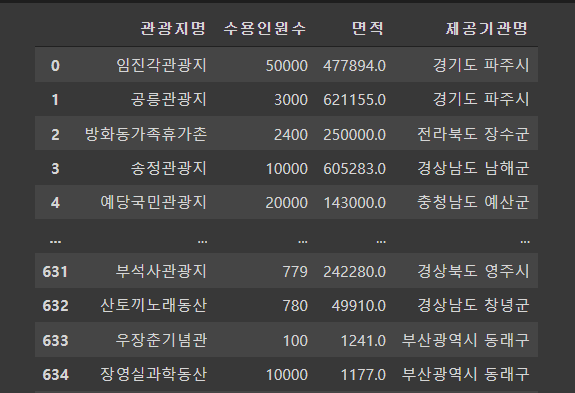

## ■ 문제 1-7. 데이터프레임의 특정 필드에 따른 최대, 최소값 구하기
부산에서 규모가 가장 큰 관광지는 어디일까요?
또한, 전국에서 규모가 가장 작은 관광지는 어디일까요?
df 와 df_busan을 사용하여 면적이 가장 크거나/작은 관광지를 찾으시오

In [ ]:
# your code here

In [ ]:
# your code here

## ■ 문제 1-8. 데이터프레임의 특정 값으로 필터링
'면적'이 4000000 보다 큰 레코드를 출력해봅시다.

데이터프레임의 column 값을 앞서 다룬
**.loc 메소드**를 활용하여 선택할 때,
lambda를 활용하여 조건에 따른 column값을 필터링 할 수 있습니다.

```
특정 컬럼값 이상을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] > some_value]
```

In [ ]:
# your code here
df.loc[lambda df: df['면적'] > 4000000, :]

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
33,담양호국민관광지,관광지,NaN,전라남도 담양군 용면 월계리 149-67,35.403522,126.996118,47920000.0,"관리사무소, 공중화장실, 전망대, 정수장, 주차장, 도로등","국민숙사(해피랜드호텔), 펜션(오쑈) 등",운동시설지구,"조경 및 휴게시설, 용마루길, 추월산 등산로","목포맛집, 수정횟집, 초원의집","가마골생태공원, JK통나무펜션단지(비호재지구)",1988-11-29,10000,500,"담양호 국민관광지는 영산강 시원지인 가마골생태공원(용소)과 청정하고 맑은 담양호, ...",061-380-2793,담양군청 녹색관광과(가마골생태공원담당),2021-06-29,4850000,전라남도 담양군
216,통도사,관광지,경상남도 양산시 하북면 통도사로 108,경상남도 양산시 하북면 지산리 583,35.498536,129.050951,16855179.0,http://tongdosa.or.kr/index.php,NaN,NaN,http://tongdosa.or.kr/bbs/content.php?co_id=me...,http://tongdosa.or.kr/bbs/content.php?co_id=me...,NaN,2000-01-01,50000,1500,http://tongdosa.or.kr/bbs/content.php?co_id=me...,055-382-7182,통도사,2021-07-27,5380000,경상남도 양산시
452,휘닉스파크관광단지,관광단지,강원도 평창군 봉평면 태기로 174 일원,강원도 평창군 봉평면 면온리 1095-1 일원,37.581373,128.327331,4233000.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장","유스호스텔, 극장, 워터파크, 컨벤션센터",상가(센타프라자),NaN,1998-10-01,38000,2800,"스키, 스노우빌리지, 워터파크 등 다양한 레저시설을 갖추고 있으며 사계절 이용 가능...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
487,무주 덕유산 리조트,관광지,"전라북도 무주군 설천면 만선로 185, (심곡리)",전라북도 무주군 설천면 심곡리 산43-15,35.889797,127.731389,7018181.0,화장실+주차장,관광호텔+가족호텔+호스텔,골프장+스키장,NaN,관광식당,전용숙소,1990-12-22,45000,10000,"덕유산의 수려한 자연환경을 느낄 수 있으며, 오스트리아풍의 건물들로 이루어진 산악형...",063-320-2558,전라북도 무주군청,2020-12-18,4740000,전라북도 무주군
493,용평관광단지,관광단지,NaN,"강원도 평창군 대관령면 용산리, 수하리 일원",37.660871,128.666483,16219204.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장",NaN,"상가, 음식점, 카페 등",NaN,2001-02-21,64000,2837,"버치힐GC, 워터파크, 그린피아콘도, 드래곤밸리호텔 등 숙박시설 및 유원시설, 골프...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
494,알펜시아관광단지,관광단지,강원도 평창군 대관령면 솔봉로 325 일원,강원도 평창군 대관령면 용산리 425 일원,37.655222,128.681494,4855224.0,"주차장, 화장실",콘도 및 호텔,"스키장, 골프장","생태학습원, 뮤직텐트,콘서트홀, 강원학생체육훈련장, 채플, 아름드리원, 늘푸른원, ...","상가, 명품아울렛, 초콜릿전시관",NaN,2005-09-23,40000,2800,"사계절 복합 리조트 시설을 갖추고 있음. 골프지구, 리조트빌리지지구, 스키지구, 동...",033-330-2746,강원도 평창군청,2020-11-25,4280000,강원도 평창군
542,웰리힐리파크 관광단지,관광단지,강원도 횡성군 둔내면 고원로 451,강원도 횡성군 둔내면 두원리 204,37.490126,128.250139,4830709.0,"스키장,콘도,골프장",콘도,"유원시설, 공연장",NaN,NaN,NaN,2005-06-15,10000,500,"스키장, 골프장, 곤돌라, 콘도",1544-8833,신안종합리조트,2021-07-22,4260000,강원도 횡성군
544,마이산도립공원 일원,관광지,전라북도 진안군 마령면 마이산남로 182,전라북도 진안군 마령면 동촌리 76-2,35.757066,127.393831,16900000.0,"화장실(6개소), 파고라,NFC(8개소)","남부 2개소, 북부 10개소",2개소,"6개소(가위박물관,명인명품관,홍삼스파,산약초타운,역사박물관,마이돈농촌테마공원)","남부(13개소),북부(13개소)",2개소(남부및북부관광안내소),1979-10-16,6500,862,마이산은 암마이봉(686m)과 수마이봉(680m)으로 진안읍 단양리와 마령면 동촌리...,063-430-8752,전라북도 진안군,2020-06-02,4730000,전라북도 진안군
545,용담호및주변시설,관광지,전라북도 진안군 안천면 안용로 793,전라북도 진안군 안천면 삼락리 1179-2,35.945933,127.525673,31400000.0,"휴게소 및 망향의동산(6개소), 화장실(5개소)",용담호주변 펜션단지(15개소),"체련공원4개소(용담,안천,상천,정천)","4개소(용담댐물문화관, 용담호사진관, 용담가족테마공원, 용담호자연생테습지공원)",없음,1개소(용담댐물관리단),2001-10-13,200,100,"댐으로 만들어진 인공호수로써 높이 70m, 길이 498m, 저수량이 8억1,500톤...",063-430-4263,한국수자원공사,2020-06-02,4730000,전라북도 진안군
546,운장산자연휴양림,관광지,전라북도 진안군 정천면 휴양림길 77,전라북도 진안군 정천면 갈용리 산 183,35.888459,127.432788,19580000.0,"도로, 관리사무소, 공중화장실3개소, 오수처리장",객실 26,없음,야영장 20개,관리사무소,관리사무소,2000-01-01,400,200,약7㎞에 달하는 운장산 계곡은 원시림과 옥류수가 연중 흐르고 순환임도와 연접하고 여...,063-432-1193,국림자연휴양관리사무소,2020-06-02,4730000,전라북도 진안군


## ■  문제 1-8.데이터프레임의 필터 함수 적용
모든 column중 "주"가 들어가는 column을 가져오는 코드를 작성해봅시다

pandas의 filter 메소드를 활용하면, column 값을 입력하지 않고도 쉽게 필터링 할 수 있습니다.
regex[Regular Expression](정규 표현식)을 이용해, 모든 column중 "주"가 들어가는 column을 가져와봅시다.
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html
```

In [ ]:
df.filter(regex ='[주]')

,소재지도로명주소,소재지지번주소,주차가능수
0,경기도 파주시 문산읍 임진각로 177,경기도 파주시 문산읍 사목리 494-1,2091
1,경기도 파주시 조리읍 장곡로 218,경기도 파주시 조리읍 장곡리 420-6,350
2,전라북도 장수군 번암면 방화동로 778,전라북도 장수군 번암면 사암리 625,200
3,경상남도 남해군 미조면 미송로 483,경상남도 남해군 미조면 송정리 1129,387
4,충청남도 예산군 응봉면 예당관광로 161,NaN,185
...,...,...,...
631,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,540
632,경상남도 창녕군 이방면 이방로 623,NaN,195
633,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,2
634,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,50


# HW2. 논리식(Logic expression)에 대한 라이브러리 사용 및 Matplotlib를 사용한 데이터 시각화

pyprover는 first-order predicate logic에 대한 증명을 파이썬 라이브러리 입니다. 슬라이드 33페이지에 있는 추론에 대해서 설명합니다.
Matplotlib은 주로 2D 그래프 차트를 위한 패키지로, 출판물 수준의 그래프를 만들어내도록 지원합니다. pdf, svg, jpg 등의 벡터 및 레스터 포맷으로 출력이 가능합니다
---

pyprover 라이브러리 설치하기

In [ ]:
!pip install pyprover

pyprover 임포트 하기

추론법칙에 대해서 알아봅니다. 2장 수학적 모델과 논리 슬라이드 33-34페이지에 대한 실습입니다

simplication
단순화
(P ^ Q) → P

In [ ]:
given = (P&Q)
conclu = P
print("true") if proves( given, conclu ) else print("false")

후건 부정(부정 논법) modus tollen

In [ ]:
given = (~Q&(P>>Q))
conclu = ~P
print("true") if proves( given, conclu ) else print("false")

구성적 양도 논법 constructive dilemma

In [ ]:
# proves( given, conclusion )
given = ((P>>Q)&(R>>S)&(P|R))
conclu = Q|S

print("true") if proves( given, conclu ) else print("false")

파괴적 양도 논법 destructive dilemma

In [ ]:
given = (((P>>Q) & (R>>S)) & (~Q|~S))
conclu = ~P|~R
print("true") if proves( given, conclu ) else print("false")

## ■ 문제 2-1. 전건 긍정 modus ponens

In [ ]:
## 코드 작성 및 true 결과 출력

## ■ 문제 2-2. 가언 삼단 논법 hypothetical syllogism

In [ ]:
## 코드 작성 및 true 결과 출력

## ■ 문제 2-3. 술어 논리 predicate logic

TE는 Exist(∃x)를 의미하고 FA는 ForAll(∀x)를 의미하는 한정자이다. 이 한정자를 predicate logic(술어 로직)와 함께 사용하는 예제를 살펴보자. (본 예제는 실행하기만 하면 됩니다)
```
Statement: Not all students like homework
Negation: There is at leat one student who does not like homework
```

In [ ]:
# x: students, P: isHomeworkLikable(x)
given = ~(FA(x, P(x))) # Not all students like homework
conclu = TE(x, ~P(x)) # There is at least one student who does not like homework
print("true") if proves( given, conclu ) else print("false")

Matplotlib 를 사용하기 Matplotlib는 그래프 차트등을 표현하는 저수준 라이브러리이다. 좀더 진보된 라이브러리를 원한다면, seaborn 등을 참고하면 좋다.

In [ ]:
# matplotlib이 없는 경우, 주석을 지우고 실행
# !pip install -U matplotlib

In [ ]:
#matplotlib 임포트하기.
import matplotlib.pyplot as plt
import numpy as np

Colab에서 한글이 제대로 나오지 않는 경우는 다음 코드를 수행하시 바랍니다(주석 해제후)

In [ ]:
plt.rc('font', family='NanumBarunGothic')
#
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

x축에 데이터를 쉽게 반영하기 위한 인덱스 설정

In [ ]:
df_hadan.set_index(['구분','년월일'])

기본적인 데이터프레임의 시각화는 plot() 명령어를 사용하여 쉽게 변경할 수 있다.
```
df.plot(figsize=(12,12))
그림 size가 12x12 크기이다.
```

In [ ]:
df_hadan.plot(figsize=(12,12))

우리는 여러 개의 그래프를 그리고자 한다.

In [ ]:
fig= plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

예를 들면 다음과 같이 4번째 그래프 차트에 x,y 값을 추가할 수 있다.
```
https://matplotlib.org/
```

In [ ]:
## 예를 들면
x = np.arange(50)
y = np.random.randn(50)
ax3.plot(x, y, 'r--')
fig

## ■ 문제 2-4 특정 값에 대한 그래프 출력
하단역(df_hadan)의 일자별로 정렬된 승차 합계인원에 따른 그래프를 그리고자 한다.
x축은 일자 혹은 관련된 index 값이어도 무방하며, y축은 승차인원의 합계가 나와야함
ax1 에 대응되는 그래프를 완성하시오

In [ ]:
df_temp = df_hadan[['년월일','합계']].loc[df_hadan['구분'] =='승차']

In [ ]:
df_temp.plot(ax=ax1)
fig

## ■ 문제 2-5 특정 조건에 따른 그래프 만들기
df_hadan 에서 승하차 인원 12000명 이상이 넘는 승하차 값으로 그래프 만들기

```
- min값은 두 리스트의 최소값의 백의 자리 ~ 일의 자리 0으로 만들 것.
- max값은 두 리스트의 최대값보다 조금 크게 할 것.
- 만약 두 리스트의 길이가 다르다면 별도의 처리를 할 것.
- 눈금의 범위는 min ~ max로 지정하고 간격은 적당하게 할 것.
```

In [ ]:
df_ride = df_hadan[['년월일','합계']].loc[df_hadan['구분'] =='승차']
df_ride_up = df_ride.loc[df_ride['합계'] > 10000]

In [ ]:
df_ride_dist = pd.DataFrame(df_ride_up, index=df_ride.index)

In [ ]:
df_ride_dist.plot(ax=ax2, linestyle='dotted')
fig

그래프 차트 스타일 변경 및 스타일 적용하기
그래프에는 여러 가지 속성이 존재한다. 그래프 유형은 막대, 선, 원그래프 등이 있고, 그래프 속성은 x축,y축 레이블, 제목, 범례(legend), x/y축의 눈금(tick), 최소 최대값 등이 있다.

iloc를 사용하여 첫번째 행과 01시-02시 데이터부터 24시-01시 데이터까지가져오자
```
df.iloc[start_row:end_row, start_col:end_col]
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
```

In [ ]:
df_hadan0 = df_hadan.iloc[:2, 5:29]
df_hadan0

## ■ 문제 2-6. 그래프의 스타일 속성을 지정하시오
df_hadan_transpose 를 막대(bar) 그래프 차트를 사용하여 그리시오
그래프에 대한 x축 레이블(label)은 '시간대'로 y축 레이블은 승하차 인원, 제목(title)은 '시간대별 승하차 인원'으로 작성하시오

In [ ]:
ax = df_hadan_transpose.plot.bar()
ax.set_xlabel("시간대")
ax.set_ylabel("승하차 인원")
ax.set_title("시간대별 승하차 인원")

다음과 같이 이미지 파일로 내보내기가 가능하다
```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
```

In [ ]:
plt.savefig("bar_chart.png")

## ■ 문제 2-7. 그래프 내 특징값 표기(annotation)
matplotlib의 annotate 라는 기능은,
그래프 내 한 지점을 문자열을 통해 가르켜주는 기능입니다.

예를 들면,
그래프 내 최솟값을 화살표로 가르켜 이 지점이 최솟값이라 표시 할 수 있습니다.


```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
(Annotate 참고)
```

다음과 같이 (그래프의 최대값)을 표시해봅시다.

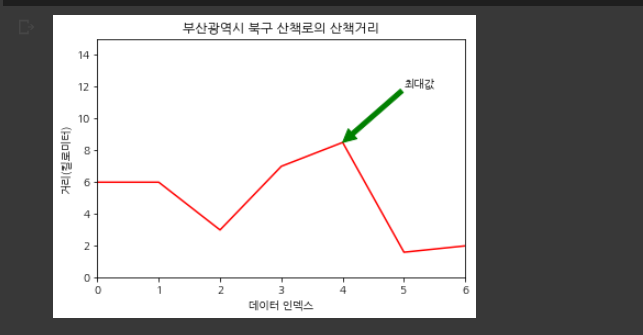

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_

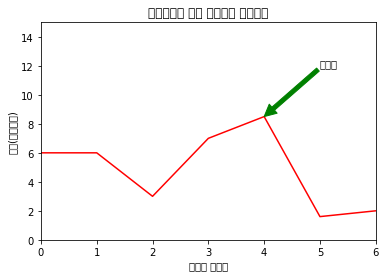

In [ ]:
pyplot.plot(ds_list,'r')
max_list = ds_list[0]
for i in range(len(ds_list)):
  if(max_list < ds_list[i]):
    max_list_y = ds_list[i]
    max_list_x = i
pyplot.annotate('최대값',xy=(max_list_x,max_list_y),xytext=(5,12),arrowprops={'color':'green'})
pyplot.title('부산광역시 북구 산책로의 산책거리')
pyplot.xlabel('데이터 인덱스')
pyplot.ylabel('거리(킬로미터)')
pyplot.axis((0,6,0,15))
pyplot.show()

## ■ 문제 2-8:히스토그램 생성하기
matplotlib에선 다양한 데이터의 시각화를 지원합니다.
히스토그램,산점도 그래프,파이 차트,막대 그래프 등 다차원 그래프도 존재합니다.

```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
(히스토그램 참고)
```

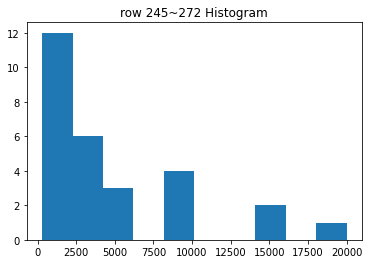

In [ ]:
df_list3 = df.loc[245:272,'수용인원수'].values.tolist()
df_list3 = list(map(int,df_list3))
df_list3.sort()
pyplot.hist(df_list3)
pyplot.title('row 245~272 Histogram')
pyplot.show()

# HW3. 데이터에 집합(Set)연산 적용하기 및 구글 드라이브와 연동하기
- 주어진 데이터셋들간에 교집합,차집합,합집합 연산을 적용해보기
- 구글 드라이브와 연동하여 파일을 쉽게 읽을 수 있도록 하기
- 구글드라이브로 공유된 파일들을 쉽게 사용하도록 하기

구글 드라이브 연동 방법
아래 코드를 실행시켜서 구글 드라이브를 마운팅 합니다. 마운팅하기 위해서는 웹브라우저를 통해 주어진 키를 복사하여 코드쉘안에 복사하여 붙여넣습니다.
구글 Colab은 기본적으로 Colab 라이브러리를 포함하고 있습니다.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## ■ 문제 3-1 구글 드라이브에서 기존의 csv 파일 불러오기 및 상위 10개 출력
자신의 구글드라이브에 아래 파일을 업로드한 뒤에, csv파일 데이터셋 불러오기를 수행하시오.
부산광역시_사하구_관광지정보.csv

해당 디렉터리의 파일에 커서를 두고,  
우클릭을 하면 해당 파일의 경로가 복사됩니다.

**앞서 다룬 csv 파일('전국관광지정보표준데이터.csv')을 
구글 드라이브에서 가져와 레코드 10개를 출력해봅시다.**  
(무작위로 가져오셔도 됩니다.)

In [ ]:
path_dataset = "/content/gdrive/MyDrive/....."
filename= "부산교통공사_시간대별 승하차인원_20210801.csv"

In [ ]:
my_df = pd.read_csv(path_dataset + filename)
my_df.head(10)

,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,휴양및문화시설정보,접객시설정보,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
626,헌인릉,관광지,서울특별시 서초구 헌인릉길 36-10,서울특별시 서초구 내곡동 산 13-1,37.465145,127.082645,247.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1970-05-26,500,20,사적 제 194호인 이곳은 동쪽의 헌릉과 서쪽의 인릉으로 구성되어 있다. 헌릉은 조...,02-440-0347,문화재청,2019-08-07,3210000,서울특별시 서초구
627,매헌 윤봉길의사 기념관,관광지,서울특별시 서초구 매헌로 99,서울특별시 서초구 양재동 236,37.471217,127.036736,2627.0,화장실+주차장,NaN,NaN,NaN,NaN,NaN,1988-12-01,400,50,윤봉길의사의 업적과 살신성인 정신의 높은 뜻을 선양하고 계승 발전시키키 위하여 19...,02-577-9932,국가보훈처,2019-08-07,3210000,서울특별시 서초구
628,고투몰,관광지,서울특별시 서초구 신반포로 200,서울특별시 서초구 잠원동 68-17,37.506598,127.005410,15601.0,화장실,NaN,NaN,NaN,NaN,NaN,1974-04-30,20000,0,"고속터미널 지하상가를 일컫는 고투몰은 카페, 음식점, 꽃시장 등 다양한 먹거리와 볼...",02-535-8182,강남터미널지하쇼핑몰,2019-08-07,3210000,서울특별시 서초구
629,"세빛섬, 반포대교 달빛무지개분수",관광지,서울특별시 서초구 올림픽대로 683,서울특별시 서초구 반포동 650,37.512028,126.995269,10421.0,화장실+주차장,NaN,수상컨벤션센터,"미디어아트갤러리, 전망대",NaN,NaN,2014-10-15,20000,635,"세빛섬은 ''세 개의 빛나는 섬''이라는 의미로, 세계 최초로 물 위에 떠 있는 부...",1566-3433,효성티앤씨,2019-08-07,3210000,서울특별시 서초구
630,삼성딜라이트,관광지,서울특별시 서초구 서초대로74길 11,서울특별시 서초구 서초동 1320-10,37.496609,127.026902,196561.0,화장실,NaN,NaN,NaN,NaN,NaN,2015-09-12,100,888,삼성딜라이트는 테마별로 꾸며진 최신 디지털 기술을 통해 미래의 새로운 생활패턴을 체...,02-2255-2277,삼성,2019-08-07,3210000,서울특별시 서초구
631,부석사관광지,관광지,경상북도 영주시 부석면 부석사로 298,경상북도 영주시 부석면 북지리 301-4,36.994497,128.679619,242280.0,"도로, 보행자도로, 광장, 안내소, 주차장, 화장실 등",-,-,"피크닉마당, 부석사 이야기길, 의상대사 스토리원 등",상가 등,-,2012-06-11,779,540,소백산 자연환경을 배경으로 한 천년고찰 부석사를 직접 참여하고 머무르는 다양한 체험...,054-639-6618,영주시,2020-07-20,5090000,경상북도 영주시
632,산토끼노래동산,관광지,경상남도 창녕군 이방면 이방로 623,NaN,35.576684,128.386189,49910.0,안내소(매표소)+주차장+화장실,NaN,롤링미끄럼틀+레일썰매장+어린이놀이터,작은동물원+토끼먹이체험장,NaN,NaN,2013-11-15,780,195,국민 동요 ‘산토끼’의 유래지역인 창녕군 이방면에 어른들에게는 어린 시절의 추억을 ...,055-530-1533,경상남도 창녕군청,2020-07-20,5410000,경상남도 창녕군
633,우장춘기념관,관광지,부산광역시 동래구 우장춘로62번길 7(온천동),부산광역시 동래구 온천동 850-48,35.213515,129.072018,1241.0,화장실,NaN,NaN,NaN,NaN,NaN,1999-10-21,100,2,씨 없는 수박으로 우리 모두에게 잘 알려진 세계적 육종학자인 故우장춘박사의 탄생 1...,051-550-6602,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
634,장영실과학동산,관광지,부산광역시 동래구 동래역사관길 18(복천동),부산광역시 동래구 복천동 1-2,35.209163,129.089669,1177.0,화장실(2동),NaN,NaN,NaN,NaN,NaN,2009-10-15,10000,50,동래출신 조선시대 세종당시 최고의 과학자인 장영실이 만든 세계최고의 옛 천문의기 1...,051-550-6604,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구
635,박차정의사생가,관광지,부산광역시 동래구 명륜로 98번길 129-10(칠산동),부산광역시 동래구 칠산동 319-1,35.201696,129.090397,379.0,없음,NaN,NaN,NaN,NaN,NaN,2005-07-08,50,0,박차정의사 생가 복원사업은 항일독립운동가이자 한국여성해방운동의 선구자인 박차정의사의...,051-860-7880,동래구 문화시설사업소,2020-12-08,3300000,부산광역시 동래구


구글드라이브로 공유된 파일을 접근하기
아래 코드는 공유 파일사용하기 위한 코드이니 그대로 사용하시면 됩니다.

In [ ]:
# pyDrive 설치
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## ■ 문제 3-2. 구글드라이브 파일 공유하고 해당 파일을 읽어오기
구글 드라이브 내 URL 기반 공유를 수행하고 해당 파일을 정상적으로 다운로드되는지 확인할
구글드라이브 id를 찾아서 아래 코드에 대입하여 실행시키시기 바랍니다

예) 공유된 폴더 링크가 다음과 같다면 https://drive.google.com/drive/folders/1-EJr-anFISoVb96QYedLx5PklEtm9JSS?usp=sharing
id는 1-EJr-anFISoVb96QYedLx5PklEtm9JSS 가 됩니다

In [ ]:
# 공유된 파일의 키를 아래에 대체하여 사용하시기 바랍니다
id= '.......'
file_list = drive.ListFile({'q': f"'{id}' in parents and trashed=false"}).GetList()

In [ ]:
# 공유된 파일리스트 확인하고 데이터를 다운로드 받습니다.
for file in file_list:
  downloaded = drive.CreateFile({'id': file['id']})
  downloaded.GetContentFile(file['title'])
  print(file['title'])

정상적으로 출력되었다면, 왼쪽에 폴더탭에서 정상적으로 파일이 다운로드된 것을 확인할 수있습니다.

데이터 측면에서 집합연산을 사용해 보기
우선 출근 시간(08-09시)과 퇴근 시간(17-18시)에서 1000명이 넘는 역들을 비교하고자 한다.

In [ ]:
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]
print( P.shape[0] , S.shape[0] )

## ■ 문제 3-3. UNION 연산 수행하기
P 와 S의 UNION에 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
union 연산을 수행한 결과는 11150이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.concat.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
https://www.w3schools.com/python/ref_set_union.asp
```

**앞서 다룬 df 데이터프레임에서,
'수용인원수'와 '주차가능수'에 대한 데이터중 임의로 10개를 가져와,    
합집합 연산을 하여 list로 출력 해봅시다.**  
(변수 사용은 자유입니다.)

In [ ]:
all_commute = pd.concat([P, S], ignore_index = True)
all_commute = all_commute.drop_duplicates()
print( all_commute.shape[0] )

['350', '2400', '35', '50000', '20000', '100', '30000', '3000', '185', '50', '10000', '200', '387', '2091', '91', '100000', '20', '1760', '0', '3300', '1000']


## ■ 문제 3-4. INTERSECTION 연산 수행하기
P 와 S의 INTERSECTION 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Intersection 연산을 수행한 결과는 3613이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
https://www.w3schools.com/python/ref_set_intersection.asp
```

In [ ]:
intersect_commute = P.merge(S)
print( intersect_commute.shape[0] )

## ■ 문제 3-5. DIFFERENCE 연산 수행하기
P 와 S의 DIFFERENCE 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Difference 연산을 수행한 결과는 각각 4650, 2887 이되어야한다

```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
https://www.w3schools.com/python/ref_set_difference.asp
```

In [ ]:
P_only = P[P.index.isin(S.index) == False]
S_only = S[S.index.isin(P.index) == False]
print( P_only.shape[0] , S_only.shape[0] )

## ■ 문제 3-6. isSubset 함수 만들기
만약 데이터프레임 dfA, dfB가 주어질 때,
dfA가 dfB의 서브셋이고, dfA가 dfB의 서브셋이라면(동치=equivalence) return True
만약 dfA가 dfB의 서브셋이고 그 반대는 성립하지 않는 경우에도 return True
그 외(서로의 서브셋이 아닌 경우, dfB가 dfA의 서브셋이지만 그 반대는 성립하지 않는 경우)는 return False
을 반환하는 함수를 작성하여라

In [ ]:
##
def isSubset(dfA, dfB):
  # your code here
  return True

isSubset(P, intersect_commute)
isSubset(P, P)
isSubset(P, S)
isSubset(P, P_only)